# Predicting NBA Team Wins and Playoff Berth from Individual Player Attributes

# Dataset Description

The dataset I've chosen for my Milestone 1 project is from the Kaggle data repository (https://www.kaggle.com/noahgift/social-power-nba). The dataset is titled "Social Power NBA" and contains performance, salary, and twitter data for 100 NBA players of the 2016-2017 season. 

Dataset Features:

PLAYER_ID, PLAYER_NAME, TEAM_ID, and TEAM_ABBREVIATION: unique player / team identifiers

AGE: age of player

GP: games played

W: wins

L: losses

W_PCT: winning percentage

MIN: average minutes per game

OFF_RATING: overall player offensive rating

DEF_RATING: overall player defensive rating

NET_RATING: overall player offensive and defensive rating

AST_PCT: assist percentage

AST_TO: assist-to-turnovers

AST_RATIO: assist-to-turnovers ratio

OREB_PCT: offensive rebounds percentage

DREB_PCT: defensive rebounds percentage

TM_TOV_PCT: team turnover rate

EFG_PCT: effective field goal percentage

TS_CT: true shooting percentage (measure of shooting efficiency)

USG_PCT: usage percentage (estimate of how often a player makes team 
plays)

PACE: pace factor (estimate of the number of possessions)

PIE: player impact factor (roughly measures a players impact on the games 
they play in)

FGM: field goals made

FGA: field goals attempted

FGM_PG: field goals made percentage

FGA_PG: field goals attempted percentage

FG_PCT: field goals total percentage

GP_RANK: games played (league rank)

W_RANK: wins (league rank)

L_RANK: losses (league rank)

W_PCT_RANK: win percentage (league rank)

MIN_RANK: minutes played (league rank)

OFF_RATING_RANK: offensive rating (league rank)

DEF_RATING_RANK: defensive rating (league rank)

NET_RATING_RANK: net rating based on offensive and defensive rating 
(league rank)

AST_PCT_RANK: assists percentage (league rank)

AST_TO_RANK: assists-to-turnover (league rank)

AST_RATIO_RANK: assist ratio (league rank)

OREB_PCT_RANK: offensive rebounds percentage (league rank)

DREB_PCT_RANK: defensive rebounds percentage (league rank)

REB_PCT_RANK: rebounds percentage (league rank)

TM_TOV_PCT_RANK: team turnover (league rank)

EFG_PCT_RANK: effective field goal percentage (league rank)

TS_PCT_RANK: true shooting percentage (league rank)

USG_PCT_RANK: usage percentage (league rank)

PACE_RANK: pace score (league rank)

PIE_RANK: player impact (league rank)

FGM_RANK: field goals made (league rank)

FGA_RANK: field goals attempted (league rank)

FGM_PG_RANK: field goals made percentage (league rank)

FGA_PG_RANK: field goals attempted percentage (league rank)

FG_PCT_RANK: field goal percentage (league rank)

WIKIPEDIA_HANDLE: players name on Wikipedia

TWITTER_HANDLE: Twitter handle

SALARY_MILLIONS: player salary (in millions)

PTS: points scored

ACTIVE_TWITTER_LAST_YEAR: whether or not the player posted on Twitter 
last year

TWITTER_FOLLOWER_COUNT_MILLIONS: number of Twitter followers

# Problem Statement
The social aspect of the NBA is arguably the most prominent of the major American sports. Including twitter data in this dataset with performance and salary statistics, allows for a more holistic view of a players impact on an organization. In a game where chemistry is tantamount and determining the appropriate salary based on the impact of a player is vital to assess personnel changes within a team, this dataset can provide the a subset of these data (100 player cross section of the NBA) to elucidate these relationships. 

Do players make more money because they have a stronger twitter following or does increased social activity result in poor performance due to off-court distractions? Ultimately, how can the on and off court impact of a player be valued for management to make better decisions in terms of winning, who to play, and how much to pay them? 

Within this assignment, I will do some exploratory data analysis, perform feature selection, and employ a logistic regression to answer the following question: does salary, on court performance, and twitter activity impact whether or not a team win enough to make the playoffs?

In [1]:
# Install necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import itertools

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import statsmodels.formula.api as sm

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
# Load NBA dataset
nba = pd.read_csv("~/Documents/UW Data Science Certificate/Methods for Data Analysis/Milestone Assignments/Data/nba_2016_2017_100.csv")
# Take a look at the first five rows
nba.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [3]:
# Get the summary statistics for the dataset
nba.describe()

,PLAYER_ID,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,...,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000
mean,3.026027e+05,1.610613e+09,27.510000,62.440000,33.020000,29.420000,0.507010,26.391000,107.728000,105.946000,...,126.700000,138.350000,110.350000,128.700000,133.120000,5.0,11.290120,15.174200,0.930000,1.516579
std,4.237828e+05,8.788445e+00,3.935066,21.261869,15.421342,12.726478,0.159991,9.221222,5.157324,4.165889,...,129.960639,136.383919,112.122171,129.410591,94.382553,0.0,8.789342,7.319374,0.256432,4.345148
min,1.717000e+03,1.610613e+09,20.000000,2.000000,0.000000,1.000000,0.000000,3.300000,86.800000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.0,0.310000,1.500000,0.000000,0.000000
25%,2.011780e+05,1.610613e+09,25.000000,55.500000,22.750000,21.000000,0.416000,19.450000,104.275000,103.625000,...,28.750000,28.750000,28.750000,28.750000,47.000000,5.0,2.842500,9.225000,1.000000,0.048000
50%,2.023305e+05,1.610613e+09,27.000000,72.000000,35.000000,30.500000,0.506500,29.700000,107.150000,106.000000,...,70.000000,82.000000,68.000000,70.500000,132.000000,5.0,10.820000,14.550000,1.000000,0.244000
75%,2.034582e+05,1.610613e+09,30.000000,77.000000,43.250000,37.250000,0.626250,33.900000,110.275000,108.525000,...,185.500000,217.250000,163.000000,188.500000,198.500000,5.0,18.400000,20.650000,1.000000,0.857750
max,1.627848e+06,1.610613e+09,39.000000,82.000000,65.000000,55.000000,0.824000,37.800000,124.200000,118.300000,...,474.000000,484.000000,465.000000,483.000000,355.000000,5.0,30.960000,31.600000,1.000000,37.000000


# Exploratory Data Analysis

I primarily focused on the exploring various ways of looking into the Wins column and what sorts of relationships I can dig deeper into with the Logistic Regression Model.

## Win distribution:

First, I took a look at the distribution of the Wins column in the dataset to get an idea of the spread of the data. Right off the bat, we can see that the wins column is fairly normally distributed. The summary statistics above, show that the average number of wins is 33. Based on the histogram, we can see a slight break in the data around 28 wins where there seem to be two distinct populations within the number of wins.


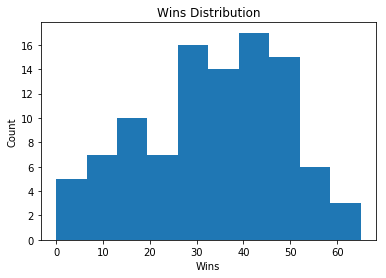

In [4]:
# Wins distribution
wins = nba.loc[:, 'W']
# plot distributions
plt.hist(wins)
plt.title('Wins Distribution')
plt.ylabel('Count')
plt.xlabel('Wins')
plt.show()

## Win correlations:

Using a correlation matrix, I looked into a few potential relationships in this dataset. I created a correlation matrix with the following attributes: Wins, Points per game, Age, Offensive Rating, Defensive Rating, Salary (millions), and Twitter Followers (millions). 


I plotted these correlations as a heatmap and there are some notable relationships such as the strong correlation between Points per Game and Salary, Points per Game and Wins, and Twitter Followers and Salary. These correlations suggest that players get paid more for scoring and in turn have a stronger following on Twitter due to their impact on their teams performance.


In [5]:
# Generate a correlation matrix from the dataset
nba_corr = nba[['W', 'PTS', 'AGE', 'OFF_RATING', 'DEF_RATING', 'SALARY_MILLIONS', 'TWITTER_FOLLOWER_COUNT_MILLIONS']].corr()
# Print the correlation matrix
nba_corr

,W,PTS,AGE,OFF_RATING,DEF_RATING,SALARY_MILLIONS,TWITTER_FOLLOWER_COUNT_MILLIONS
W,1.000000,0.475038,0.203069,0.422244,-0.253202,0.391831,0.250282
PTS,0.475038,1.000000,-0.031333,0.271257,-0.004879,0.647343,0.327236
AGE,0.203069,-0.031333,1.000000,-0.104785,-0.266586,0.301526,0.245081
OFF_RATING,0.422244,0.271257,-0.104785,1.000000,0.039845,0.188706,0.265210
DEF_RATING,-0.253202,-0.004879,-0.266586,0.039845,1.000000,-0.035141,-0.046075
SALARY_MILLIONS,0.391831,0.647343,0.301526,0.188706,-0.035141,1.000000,0.443932
TWITTER_FOLLOWER_COUNT_MILLIONS,0.250282,0.327236,0.245081,0.265210,-0.046075,0.443932,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

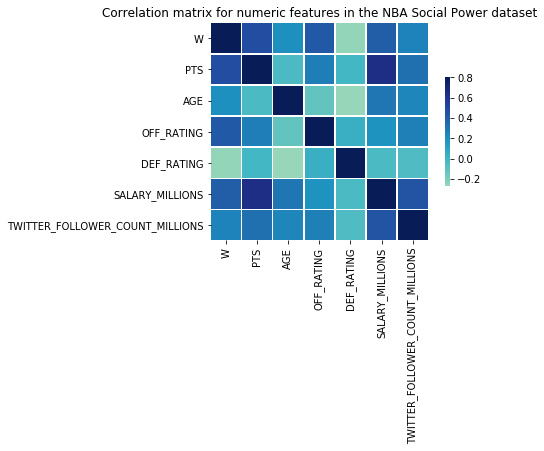

In [6]:
# Generate a heat map based on the correlation matrix created above
sns.heatmap(nba_corr, vmax=.8, center=0,
            square=True, cmap = "YlGnBu", linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features in the NBA Social Power dataset') # make a plot title
plt.yticks(rotation='horizontal') # rotate y tick marks
plt.xticks(rotation='vertical') # rotate x tick marks

## Wins vs Field Goals Attempted:

I found that one of the stronger relationships was between Wins and Field Goals Attempted. The strong positive correlation between these two variables suggests that the more field goal attempts taken by a player results in more wins for their team. In some ways this makes sense, with more shot attempts resulting in more points and ultimately a higher chance of winning. However, from a coaching perspective, it's usually emphasized to have better shot selection in taking more high percentage shots. These data alone may decieve a player into just generally shooting more because the attempts correlate with wins.


Text(0.5, 1.0, 'Wins vs. Field Goal Attemps')

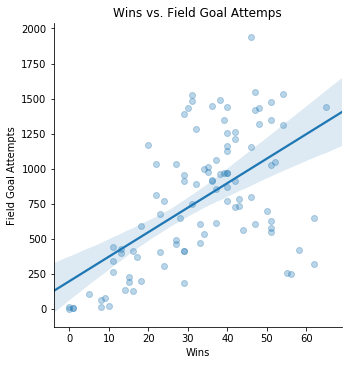

In [7]:
# Scatter plot of wins vs field goals attempted
sns.lmplot(x = 'W', y = 'FGA', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Wins') # Label the x axis
plt.ylabel('Field Goal Attempts') # Label the y axis
plt.title('Wins vs. Field Goal Attemps') # Give plot a title

## Wins vs PIE rating:

As data continues to be collected at such a high rate in the NBA, the creation of new statistics to describe a players impact are created in order to make more data driven decisions. One of these statistics that is commonly used by NBA.com is called PIE, a metric that measures the percentage of game events (Points, Rebounds, Assists, etc) the player achieved in a game. This metric typically trends with wins (I assessed this correlation below) but I was curious to see if the PIE metric was related to the number of twitter followers a player has. 

Below, the first scatter plot shows that there is a weaker relationship between the PIE rating and wins than I expected. Although the trend still weakly holds, I expected there to be a stronger correlation. 

The second scatter plot displays a relationship between twitter followers and PIE rating but the trend only holds with players with a higher number of twitter followers. These look like outliers that are making the correlation appear better than it really is. The points clustered on left part of the plot are made up with players that have do not have many twitter followers but a variable PIE rating. This trend makes sense because it would be expected to see better players have more Twitter followers and also have a high PIE rating but there also are players who have higher PIE ratings without having as many Twitter followers.

Text(0.5, 1.0, 'Twitter Followers vs. PIE Rating')

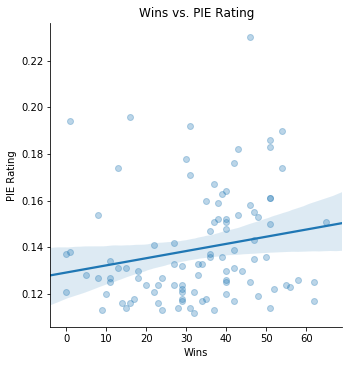

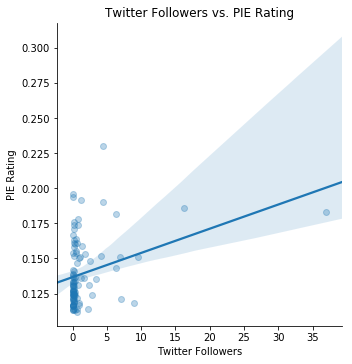

In [8]:
# Scatter Plot comparing wins and PIE rating
sns.lmplot(x = 'W', y = 'PIE', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Wins') # Label x axis
plt.ylabel('PIE Rating') # Label y axis
plt.title('Wins vs. PIE Rating') # Give plot a title

# Scatter Plot
sns.lmplot(x = 'TWITTER_FOLLOWER_COUNT_MILLIONS', y = 'PIE', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Twitter Followers') # Label x axis
plt.ylabel('PIE Rating') # Label y axis
plt.title('Twitter Followers vs. PIE Rating') # Give plot a title


# Data Preparation for Logistic Regression

My main question centers around how individual on-court performance, age, salary, and Twitter activity can influence a players chance of making the playoffs. The first step is to identify a cut-off number of wins that would be required to make the playoffs. Typically, it requires at least 42 regular season wins to make the playoffs, I based this cut off based on FiveThirtyEight predictions for the NBA playoffs and this is also a good measure of a winning team since having greater than 41 games would result in a winning overall record. 

Below I created a new variable called target and one hot encoded the Wins column so that when the Wins column has a value greater than or equal to 42, the target column will hold a value of 1. Any value in the Wins column that's less than 42 will be coded as a 0. This is the target column that I am basing my Logisitic Regression model on to predict whether a player has the attributes that would result in their team reaching the playoffs (and having a winning record).

Further data preparation was required to initiate the feature selection prior to defining the inputs to the Logistic Regression model. I removed all the features that were unique identifiers (player or team), a few of the categorical variables (Wikipedia and Twitter handles), CFPARAMS, and any obvious features that would have a correlation with the number of wins associated with each player. Then, I split the dataset into features and the target column.

In [9]:
# Generate a new target column with the wins one hot encoded for where greater than 42 wins is coded as 1 and less than is coded as 0
nba.loc[:, 'target'] = (nba.loc[:, 'W'] >= 42).astype(int)


In [10]:
# Drop target column and features that are unique identifiers or directly related to number of wins
not_features = ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE', 
                'CFPARAMS', 'W_RANK', 'W_PCT', 'W_PCT_RANK', 'W', 'target']

# Create a dataframe with the dropped features removed
nba_dropped = nba.drop(not_features, axis = 1)

# Split data into features and targets
features = nba.drop(not_features, axis = 1).values # features
target = nba[["target"]].values # target


# Feature Selection

I decided to do Backwards Feature Selection to identify the 5 most important features to use in my Logistic Regression model to predict which player attributes were most likely to result in their team reaching the playoffs. Ultimately, I decided to select 10 of the features with this method and then include a few of the features I was curious about their ability to predict whether or not a player will be on a team that will make the playoffs. 

The backwards feature selection technique determined that the most important features were the following: games played, offensive rating, defensive rating, assist ratio, pace, field goals made, games played (league rank), losses (league rank), average minutes played (league rank), and team turnover percentage (league rank).

The features I added were the following: age, PIE (league rank), salary in millions, points, and whether or not the player was active on twitter in the last year.

I removed a few of the redundant rank attributes and I also removed games played and losses (league rank) because they semed too closely associated with wins from a practical sense.

The final features for the Logistic Regression model were the following: age, average minutes played per game, offensive rating, defensive rating, team turnover percentage (league rank), assist ratio, pie rating (league rank), field goals made, salary, points, pace, and whether the player was active on Twitter in the last year.

In [11]:
# Feature extraction
model = LogisticRegression() # use linear regression model for all features
rfe = RFE(model, 10) # use rfe to select top 3
fit = rfe.fit(features, target) # fit our model
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 10
Selected Features: [False  True False False  True  True False False False  True False False
 False False False False False  True False  True False False False False
  True  True  True False False False False False False False False False
  True False False False False False False False False False False False
 False False False False]
Feature Ranking: [25  1 14 19  1  1 22 34 26  1 41 43 42 29 37 35 39  1 38  1 27 33 28 36
  1  1  1  8 18 10  3  2 15  4 21  5  1 17 13  7 11 12  9 24  6 23 20 30
 16 32 31 40]


/Users/caseythayer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Establish target and features
target = nba[['target']]
feats = nba[['AGE', 'MIN', 'OFF_RATING', 'DEF_RATING', 'TM_TOV_PCT_RANK', 'AST_RATIO', 'PIE_RANK',
             'FGM', 'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR', 'PACE']]

In [99]:
# Split our original data into training and test sets
feat_train, feat_test , target_train, target_test = model_selection.train_test_split(feats, target, 
                                                    test_size=0.3, random_state=6)

In [100]:
# Instantiate logistic regression model and fit to train dataset
clf = LogisticRegression()
logR = clf.fit(feat_train, target_train)
logR.score(feat_train, target_train)

/Users/caseythayer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9142857142857143

In [101]:
# Instantiate the model and fit to test dataset
clf = LogisticRegression()
logR = clf.fit(feat_test, target_test)
logR.score(feat_test, target_test)

/Users/caseythayer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

# Logistic Regression Conclusions

First, I split the dataset into a training and testing subsets, with the test subset being 30% of the dataset. I ran the Logistic Regression model on the training dataset and then ran it on the testing dataset. The training dataset showed 91% accuracy and the testing dataset showed 97%. 

The test dataset has some very strong results and based on the features selected, this makes sense. The features that were selected reinforce a lot of strategies that basketball teams use to improve their number of wins. Results of this model suggest the following concepts are true about NBA player attributes that win enough to make the playoffs.

* Healthy enough to play a lot of minutes and games (age, minutes, pace)
* Exhibit on-court success (offensive/defensive ratings, pie rank, field goals made, points)
* Contribute to team successes (team turnover percentage rank, assist ratio)
* Off court success (salary, Twitter activity)


# Random Forest Classifier Model

I employed the Random Forest Classifier model to compare to the results of the Logisitic Regression model. I was curious to see if the fit improved with the Random Forest method. The Random Forest Classifier model works by subsetting the training dataset and creating a number of decision trees. Then the results of each decision tree are aggregated and ultimately define the classification of the test object. 


In [102]:
# Instantiate Random Forest Classifier Model and fit to training dataset
rfc = RandomForestClassifier()
rfc.fit(feat_train, target_train)
# Score of the fit to the training dataset
rfc.score(feat_train, target_train)

/Users/caseythayer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9857142857142858

In [103]:
# Instantiate Random Forest Classifier Model and fit to testing dataset
rand_forest = rfc.fit(feat_test, target_test)
# Score of the fit to the test dataset
rfc.score(feat_test, target_test)

/Users/caseythayer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9666666666666667

# Random Forest Classifier Model Conclusions

Below, the Random Classifier model shows 99% accuracy on the training dataset and 93% on the test dataset. It's interesting to see a stronger fit on the training dataset with the Random Forest Classifier model than the Logistic Regression model (99% and 97% respectively). However, when it comes to the test dataset, the fit is the same with 93% accuracy for both models. 

These results make me think that we need more data to draw a more accurate prediction. Since we are only taking 30% of the data for the test set, we may not have enough data to reveal which model more accurately predicts whether a team will make the playoffs based on individual player attributes. The training data accuracy suggests that the random forest model might work better than the logisitic regression model and this would be good to keep in mind once more data are collected for further evaluation of the two models.

To dig deeper into the correlations between these attributes and team wins, I ran a regression model with the same features to predict the trend in wins in general (not necessarily whether or not they'd make the playoffs).

# Multivariate Regression Model

I wanted to dig deeper into the regression characteristics between all of the features and how each one correlates with the win values for each player. I started by scaling the features and the target, using a scaling function defined below. Then, I ran the multivariate regression model with all scaled features to determine how well each of these features predict the target and also how well they predict when combined. I know that these features provided good results with the Logistic Regression and Random Forest Classifier models (predicting whether or not a player would make the playoffs), however, I also wanted to look at the impact of each features and their affect on predicting the number of wins.

In [104]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [105]:
# Scale all columns first
nba['AGE'] = scale(nba['AGE']) 
nba['MIN'] = scale(nba['MIN'])
nba['OFF_RATING'] = scale(nba['OFF_RATING'])
nba['DEF_RATING'] = scale(nba['DEF_RATING'])
nba['AST_RATIO'] = scale(nba['AST_RATIO'])
nba['PIE_RANK'] = scale(nba['PIE_RANK'])
nba['PACE'] = scale(nba['PACE'])
nba['TM_TOV_PCT_RANK'] = scale(nba['TM_TOV_PCT_RANK'])
nba['FGM'] = scale(nba['FGM'])
nba['SALARY_MILLIONS'] = scale(nba['SALARY_MILLIONS'])
nba['PTS'] = scale(nba['PTS'])
nba['ACTIVE_TWITTER_LAST_YEAR'] = scale(nba['ACTIVE_TWITTER_LAST_YEAR'])

scaled_feats = nba[['AGE', 'MIN', 'OFF_RATING', 'DEF_RATING', 'TM_TOV_PCT_RANK', 'AST_RATIO', 'PIE_RANK',
             'FGM', 'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR', 'PACE']]

# Scale target
nba['W'] = scale(nba['W'])


In [106]:
# Establish scaled target and scaled features
scaled_target = nba[['W']]
scaled_features = scaled_feats

# Inititate regression model with scaled features and target
scaled_ols_model = sm.ols(formula = 'scaled_target ~ scaled_features', data = nba)

scaled_results = scaled_ols_model.fit()
n_points = nba.shape[0]
y_output = nba['W'].values.reshape(n_points, 1)

# Print scaled results
scaled_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          scaled_target   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     20.35
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.28e-20
Time:                        10:53:44   Log-Likelihood:                -75.050
No. Observations:                 100   AIC:                             176.1
Df Residuals:                      87   BIC:                             210.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept                    0      0.055          0      1.000      -0.109       0.109
scaled_features[0]      0.2492      0.065      3.815      0.000       0.119       0.379
scaled_features[1]     -0.0483      0.147     -0.327      0.744      -0.341       0.245
scaled_features[2]      0.4564      0.064      7.170      0.000       0.330       0.583
scaled_features[3]     -0.2710      0.062     -4.365      0.000      -0.394      -0.148
scaled_features[4]      0.1873      0.063      2.989      0.004       0.063       0.312
scaled_features[5]     -0.0728      0.059     -1.237      0.219      -0.190       0.044
scaled_features[6]      0.1959      0.075      2.615      0.011       0.047       0.345
scaled_features[7]      1.2422      0.146      8.480      0.000       0.951       1.533
scaled_features[8]     -0.0205      0.085     -0.240      0.811      -0.190       0.149
scaled_features[9]     -0.6252      0.176     -3.542      0.001      -0.976      -0.274
scaled_features[10]     0.0066      0.056      0.117      0.907      -0.106       0.119
scaled_features[11]     0.0254      0.061      0.418      0.677      -0.095       0.146
==============================================================================
Omnibus:                        4.836   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.157
Skew:                          -0.443   Prob(JB):                        0.125
Kurtosis:                       3.461   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Linear Regression Results

The R-squared results from the model reveal that all of these features are quite correlated with wins (R-squared = 0.74). Overall, the coefficients are all relatively low, which is another good sign. Drilling down on each attribute and analyzing the p-value, we can see that the most statistically significant features are: games played, age, minutes, and offensive rating. These attributes further emphasize the need to keep players healthy in order to maximize a team's chances of winning. Furthermore, age being such a strong attribute, emphasizes the need to keep players healthy long enough to become veterans. Veterans can play a variety of roles on a team and sometimes their impact cannot always be expressed in a statistical way but I think that the older ages of players correlating with team wins is a way to recognize how veteran players increase a team's chances of winning.

# Conclusions

Using the NBA dataset, I dug into a variety of player attributes (on-court and off-court) to determine which features lead to the best chance of their team making the playoffs. I performed initial exploratory analysis, prepared the data, and selected the most optimal features. I ran a Logistic Regression based on the target of the player's team either making the playoffs or not making the playoffs. Next, I ran a Multivariate Linear Regression model, to understand the correlation between all of the features and just wins in general. I've broken down the conclusions for each portion of the assignment.

### Exploratory Data Analysis / Data Preparation
* The wins data are normally distributed with two distinct populations broken up above and below 28 wins
* Wins correlate well with points scored, offensive rating, salary, and field goals attempted but correlates relatively weakly with a PIE rating.
* I prepared for a Logistic Regression model by one hot encoding the wins column into whether the player had enough wins for the team to typically make the playoffs (greater than 42 wins)

### Feature Selection
* I employed backwards feature selection to pick the best features to predict whether the player's team makes the playoffs or not
* I removed a few redundant features and included a few extras that I thought could have an impact
* I split the dataset into testing and training subsets to prepare for Logistic Regression model

### Logistic Regression
* The training dataset performed well with 91% accuracy and the test dataset performed with 97% accuracy
* These results suggest that the following player attributes are vital to a teams chances of winning: health, offensive efficiency, contributing to team statistics, and off court successes

### Random Forest Classifier
* This model performed better on the training dataset than the Logistic Regression model (99% compared to 91% respectively)
* However, the same accuracy was observed with Logistic Regression and the Random Forest Classifier models (97% accuracy)
* These results suggest that the Random Classifier model may be the better model to determine if individual NBA player attributes can predict whether their team will make the playoffs or not. However, it appears that more data need to be collected to confirm this since the test datasets were predicted at the same level of accuracy but the portion of the dataset that was set aside for testing is relatively small. With more data, we may be able to discern which model performs better with this dataset.

### Multivariate Linear Regression Model
* To dig deeper into each attribute and their correlation with overall wins (not whether or not the team would have enough wins to make the playoffs), I ran a Mulivariate Linear Regression model after scaling all of the data
* R-squared of 0.74 is quite good and confirms the results observed in the Logistic Regression and Random Forest Classifier models
* The most impactful features were related to the health of the player, the offensive efficiency, and the age of the player
    * These attributes were gleaned from the Logistic Regression and Random Forest Classifer models as well and brings up an interesting point about how important veterans are to a teams success

Overall, these results emphasize the need for teams to keep players healthy, maximize a players offensive efficiency, find the right players to improve team chemistry in order to play team basketball, and ensure that their veterans are taken care of to give the team the best chance to win and ultimately make the playoffs
